In [15]:
#import the libraries we need

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense,Dropout,Lambda,Flatten
from keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split




In [16]:
#load data
train = pd.read_csv("train.csv")
X_test  = pd.read_csv('test.csv')



X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
print(X_train.shape)
print(X_test.shape)

train.head(5)

(42000, 784)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 784)


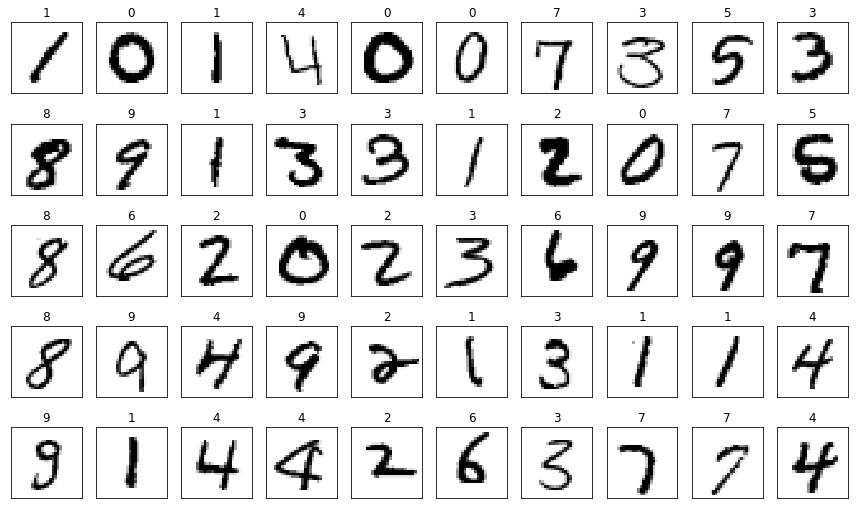

In [17]:
#visualize the data
print(X_train.shape)
fig = plt.figure(figsize=(15,9))
for i in range(50):
    ax = fig.add_subplot(5,10,i+1)
    ax.imshow(X_train.iloc[i].values.reshape(28,28), cmap = plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(y_train[i])

In [18]:
#checking the missing  value ,no missing value
train.isnull().any().value_counts()
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Preprocessing the digit images

In [19]:
#reshape the image
X_train = X_train.values/255
X_test = X_test.values/255



In [20]:
#convert the y_train to matrix format
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
print(y_train.shape)

(42000, 10)


#Design Neural Network


In [21]:
seed = 33
np.random.seed(seed)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,RMSprop

In [26]:
model = Sequential()
model.add(Dense(64,activation='relu', input_dim=784))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

#sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9,nesterov = True)
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size = 128)
index = model.predict(X_test)
index = np.argmax(index,axis = 1)

Epoch 1/10
42000/42000 [==============================] - 3s 65us/step - loss: 0.9849 - acc: 0.6758
Epoch 2/10
42000/42000 [==============================] - 3s 65us/step - loss: 0.5211 - acc: 0.8458
Epoch 3/10
42000/42000 [==============================] - 3s 61us/step - loss: 0.4326 - acc: 0.8769
Epoch 4/10
42000/42000 [==============================] - 3s 62us/step - loss: 0.3921 - acc: 0.8871
Epoch 5/10
42000/42000 [==============================] - 3s 61us/step - loss: 0.3684 - acc: 0.8960
Epoch 6/10
42000/42000 [==============================] - 3s 62us/step - loss: 0.3479 - acc: 0.9016
Epoch 7/10
42000/42000 [==============================] - 3s 63us/step - loss: 0.3299 - acc: 0.9056
Epoch 8/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.3177 - acc: 0.9096
Epoch 9/10
42000/42000 [==============================] - 3s 61us/step - loss: 0.3178 - acc: 0.9113
Epoch 10/10
42000/42000 [==============================] - 3s 65us/step - loss: 0.3069 - acc: 0.9135

In [30]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(index)+1)),
                         "Label": index})
submissions.to_csv("DR.csv", index=False, header=True)